# Digital Filters

In this notebook I am going to apply a few filtering methods to images from the KDEF dataset. The KDEF dataset can be found here: http://kdef.se/ 

In [75]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

Now the data set will be imported and saved in a dictionary. The images will be converted to the hsv colorspace.

In [2]:
path = 'KDEF_and_AKDEF/KDEF/AF01/'
filepath = os.listdir(path)
img = {}
i = 0
for f in filepath:
    img1 = cv2.imread(path+f)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
    img[i] = img1
    i += 1

One of the images can be plotted

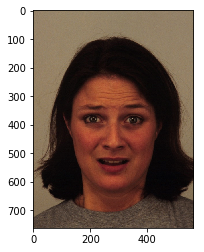

In [3]:
plt.imshow(cv2.cvtColor(img[4], cv2.COLOR_HSV2RGB))
plt.show()

## Mean Filter

The mean filter will first be applied to the original colored image

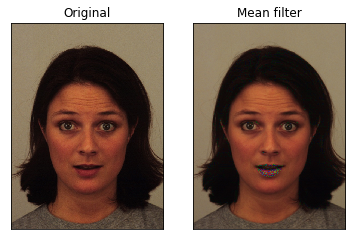

In [95]:
image = img[34]
figure_size = 3
new_image = cv2.blur(image,(figure_size, figure_size))


plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

The artifacts are caused by outliers that effect the mean.

Now the mean filter will be applied to a greyscale image

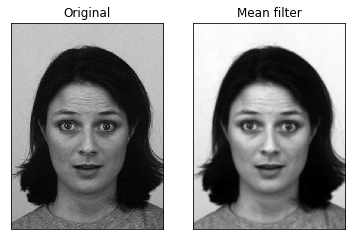

In [98]:
image = cv2.cvtColor(img[34], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = cv2.blur(image,(figure_size, figure_size))

plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

There do not appear to be any artifacts when we deal with greyscale images

## Median Filter

The median filter will first be applied by to a color image and then it will be applied to a grayscale image.

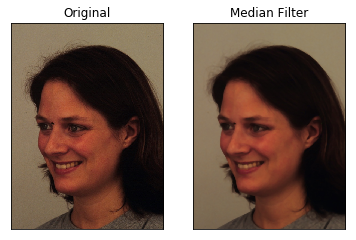

In [99]:
image = img[17]
figure_size = 7
new_image = cv2.medianBlur(image, figure_size)

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

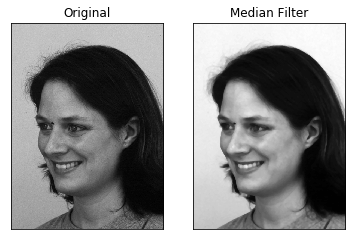

In [100]:
image = cv2.cvtColor(img[17], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = cv2.medianBlur(image, figure_size)

plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The medain filter isn't as affected by outliers than the mean filter.

## Gaussian Filter

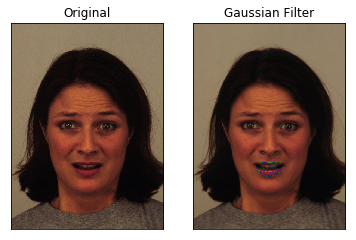

In [102]:
image = img[4]
figure_size = 3
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

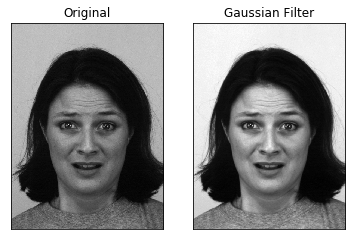

In [103]:
image = cv2.cvtColor(img[4], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Laplacian Filter

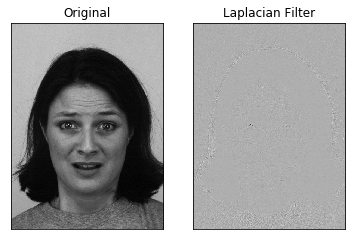

In [104]:
image = cv2.cvtColor(img[4], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = cv2.Laplacian(image,cv2.CV_64F)

plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

Laplacian Filter outputs an image that emphasizes the edges. It is a high pass filter.

## Conservative Smoothing

In [105]:
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow = len(data)
    ncol = len(data[0])
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer,i+indexer+1):
                for m in range(j-indexer,j+indexer+1):
                    if ((k >=0) and (k <= (nrow-1))) and ((m >= 0) and (m <= (ncol-1))):
                        temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

def conservative_smoothing_hsv(data, filter_size):
    h,s,v = cv2.split(data)
    h = conservative_smoothing_gray(h, filter_size)
    s = conservative_smoothing_gray(s, filter_size)
    v = conservative_smoothing_gray(v, filter_size)
    data = cv2.merge((h,s,v))
    return data

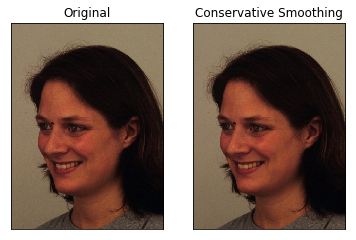

In [106]:
new_image = conservative_smoothing_hsv(img[17],3)

plt.subplot(121), plt.imshow(cv2.cvtColor(img[17], cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

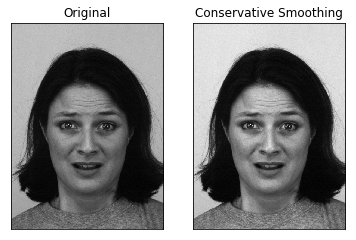

In [107]:
image = cv2.cvtColor(img[4], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = conservative_smoothing_gray(image,5)

plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

## Low pass Filter

First, a grayscale image will be converted from the spatial domain to the frequency domain.

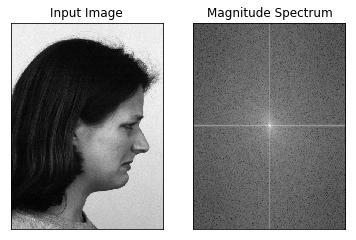

In [121]:
image = cv2.cvtColor(img[11], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Now a low pass filter will be used to keep the low frequencies. This blurs the edges in the image.

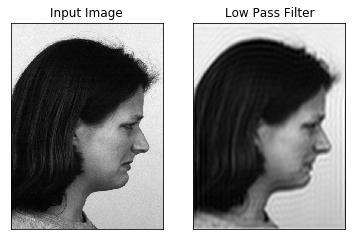

In [122]:
rows, cols = image.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

## Unsharp Filter

The unsharp filter can be used to emphasize the edges in an image.

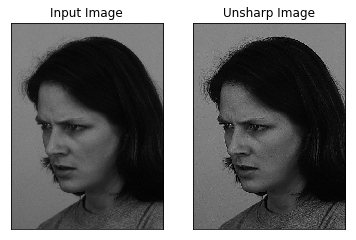

In [118]:
image = cv2.cvtColor(img[7], cv2.COLOR_HSV2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = Image.fromarray(image.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Image'), plt.xticks([]), plt.yticks([])
plt.show()

The unsharp filter emphasizes the the edges in the original image and some of the noise in the original image.